In [1]:
from keras.datasets import cifar10
from keras.utils import np_utils
from matplotlib import pyplot as plt
import numpy as np
from PIL import Image

In [2]:
# load the data
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

170508288/170498071 [==============================] - 13s 0us/step


In [3]:
# Lets determine the dataset characteristics
print('Training Images: {}'.format(X_train.shape))
print('Testing Images: {}'.format(X_test.shape))

Training Images: (50000, 32, 32, 3)
Testing Images: (10000, 32, 32, 3)


In [4]:
# Now for a single image 
print(X_train[0].shape)

(32, 32, 3)


In [5]:
#preprocessing


In [6]:
# Building a convolutional neural network for object recognition on CIFAR-10

# fix random seed for reproducibility
seed = 6
np.random.seed(seed) 

# load the data
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

# normalize the inputs from 0-255 to 0.0-1.0
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train = X_train / 255.0
X_test = X_test / 255.0

In [7]:
# class labels shape
print(y_train.shape)
print(y_train[0])

(50000, 1)
[6]


In [8]:
# hot encode outputs
Y_train = np_utils.to_categorical(y_train)
Y_test = np_utils.to_categorical(y_test)
num_classes = Y_test.shape[1]

print(Y_train.shape)
print(Y_train[0])

(50000, 10)
[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]


In [9]:
#builiding allcnn


In [10]:
# start building the model - import necessary layers
from keras.models import Sequential
from keras.layers import Dropout, Activation, Conv2D, GlobalAveragePooling2D
from tensorflow.keras.optimizers import SGD
def allcnn(weights=None):
    # define model type - Sequential
    model = Sequential()

    # add model layers - Convolution2D, Activation, Dropout
    model.add(Conv2D(96, (3, 3), padding = 'same', input_shape=(32,32,3)))
    model.add(Activation('relu'))
    model.add(Conv2D(96, (3, 3), padding = 'same'))
    model.add(Activation('relu'))
    model.add(Conv2D(96, (3, 3), padding = 'same', strides = (2,2)))
    model.add(Dropout(0.5))

    model.add(Conv2D(192, (3, 3), padding = 'same'))
    model.add(Activation('relu'))
    model.add(Conv2D(192, (3, 3), padding = 'same'))
    model.add(Activation('relu'))
    model.add(Conv2D(192, (3, 3), padding = 'same', strides = (2,2)))
    model.add(Dropout(0.5))

    model.add(Conv2D(192, (3, 3), padding = 'same'))
    model.add(Activation('relu'))
    model.add(Conv2D(192, (1, 1), padding = 'valid'))
    model.add(Activation('relu'))
    model.add(Conv2D(10, (1, 1), padding = 'valid'))

    # add GlobalAveragePooling2D layer with Softmax activation
    model.add(GlobalAveragePooling2D())
    model.add(Activation('softmax'))
    
    # load the weights
    if weights:
        model.load_weights(weights)
    
    # return model
    return model

In [11]:
#4. Defining Parameters and Training the Model

In [12]:
# define hyper parameters
learning_rate = 0.01
weight_decay = 1e-6
momentum = 0.9

# build model 
model = allcnn()

# define optimizer and compile model
sgd = SGD(lr=learning_rate, decay=weight_decay, momentum=momentum, nesterov=True)
model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])

# print model summary
print (model.summary())

# define additional training parameters
epochs = 350
batch_size = 32

# fit the model
model.fit(X_train, Y_train, validation_data=(X_test, Y_test), epochs=epochs, batch_size=batch_size, verbose = 1)


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 96)        2688      
                                                                 
 activation (Activation)     (None, 32, 32, 96)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 96)        83040     
                                                                 
 activation_1 (Activation)   (None, 32, 32, 96)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 16, 16, 96)        83040     
                                                                 
 dropout (Dropout)           (None, 16, 16, 96)        0         
                                                                 
 conv2d_3 (Conv2D)           (None, 16, 16, 192)       1

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


None
Epoch 1/350
1563/1563 [==============================] - 40s 18ms/step - loss: 2.0369 - accuracy: 0.2274 - val_loss: 1.6979 - val_accuracy: 0.3535
Epoch 2/350
1563/1563 [==============================] - 27s 17ms/step - loss: 1.5406 - accuracy: 0.4260 - val_loss: 1.3660 - val_accuracy: 0.4918
Epoch 3/350
1563/1563 [==============================] - 26s 17ms/step - loss: 1.2560 - accuracy: 0.5467 - val_loss: 1.1129 - val_accuracy: 0.6003
Epoch 4/350
1563/1563 [==============================] - 26s 17ms/step - loss: 1.0540 - accuracy: 0.6229 - val_loss: 0.9335 - val_accuracy: 0.6701
Epoch 5/350
1563/1563 [==============================] - 27s 17ms/step - loss: 0.9143 - accuracy: 0.6740 - val_loss: 0.8943 - val_accuracy: 0.6923
Epoch 6/350
1563/1563 [==============================] - 27s 17ms/step - loss: 0.8021 - accuracy: 0.7194 - val_loss: 0.7839 - val_accuracy: 0.7244
Epoch 7/350
1563/1563 [==============================] - 26s 17ms/step - loss: 0.7177 - accuracy: 0.7463 - val_lo

In [13]:
#making predictions


In [15]:
# make dictionary of class labels and names
classes = range(0,10)

names = ['airplane',
        'automobile',
        'bird',
        'cat',
        'deer',
        'dog',
        'frog',
        'horse',
        'ship',
        'truck']

# zip the names and classes to make a dictionary of class_labels
class_labels = dict(zip(classes, names))

# generate batch of 9 images to predict
batch = X_test[100:109]
labels = np.argmax(Y_test[100:109],axis=-1)

# make predictions
predictions = model.predict(batch, verbose = 1)


1/1 [==============================] - 0s 18ms/step


In [17]:
# print our predictions
print (predictions)

[[3.85374380e-22 5.85538748e-27 2.04229967e-16 4.36437882e-16
  1.00000000e+00 3.79707116e-12 1.22906418e-15 6.00052186e-09
  1.25689170e-22 1.20390572e-20]
 [1.80133240e-18 2.62557492e-19 4.55800560e-04 1.63415517e-03
  2.80371182e-06 9.97889340e-01 7.97645043e-06 9.91463821e-06
  2.44860013e-14 3.44172022e-12]
 [2.79520453e-36 1.38494579e-22 4.22009509e-22 1.11884862e-24
  1.21196645e-25 5.41917978e-24 1.00000000e+00 2.72636677e-26
  4.57538988e-28 9.09623862e-26]
 [1.62990873e-32 3.00930558e-33 7.56990889e-15 9.99999642e-01
  1.54090650e-26 1.24649013e-17 4.10378192e-07 4.67267479e-24
  4.97115209e-32 1.87957820e-27]
 [0.00000000e+00 1.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 1.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [1.07959709e-17 6.25015551e-19 2.98194750e-03 9.88252819e

In [18]:
for image in predictions:
    print(np.sum(image))

1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0


In [21]:
class_result = np.argmax(predictions,axis=-1)
print(class_result)

[4 5 6 3 1 1 3 6 8]


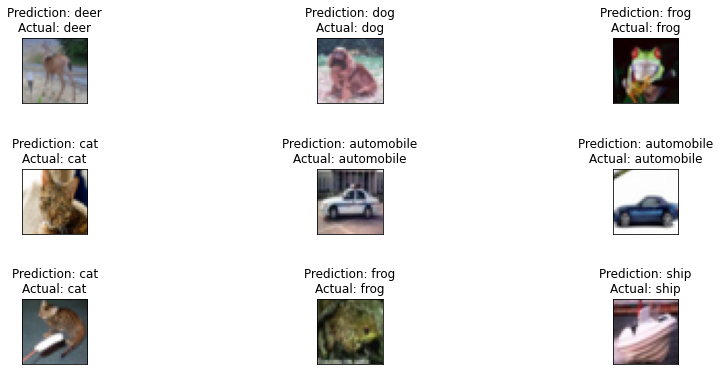

In [30]:
# create a grid of 3x3 images
fig, axs = plt.subplots(3, 3, figsize = (15, 6))
fig.subplots_adjust(hspace = 1)
axs = axs.flatten()

for i, img in enumerate(batch):

    # determine label for each prediction, set title
    for key, value in class_labels.items():
        if class_result[i] == key:
            title = 'Prediction: {}\nActual: {}'.format(class_labels[key], class_labels[labels[i]])
            axs[i].set_title(title)
            axs[i].axes.get_xaxis().set_visible(False)
            axs[i].axes.get_yaxis().set_visible(False)
            
    # plot the image
    axs[i].imshow(img.transpose([0,1,2]))
    
# show the plot
plt.show()